In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("Housing.csv", low_memory=False)
pd.set_option('display.max_columns', None)

FileNotFoundError: [Errno 2] No such file or directory: 'Housing.csv'

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1225000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1225000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1221500,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1141000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
data.shape

(545, 13)

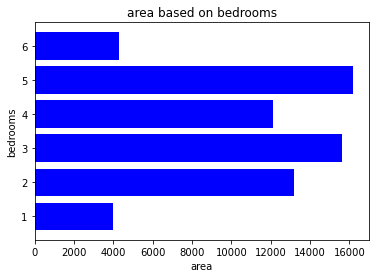

In [6]:
plt.barh("bedrooms", "area", data = data, color = "blue")
plt.xlabel("area")
plt.ylabel("bedrooms")
plt.title("area based on bedrooms")
plt.show()

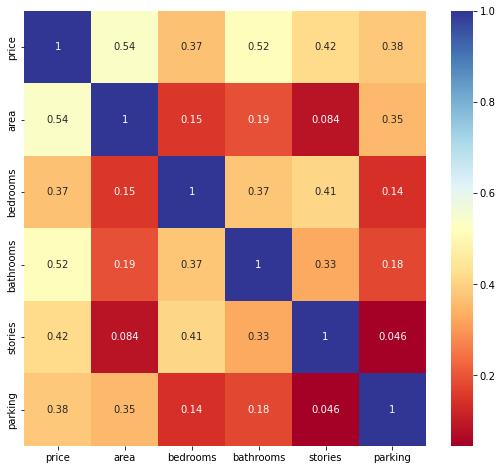

In [7]:
plt.figure(figsize=(9,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

In [8]:
x = data.drop(['price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1).values
y = data['price'].values

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)

In [12]:
model.score(x_test, y_test)

0.627799912393334

Text(0.5, 1.0, 'Actual vs. predicted')

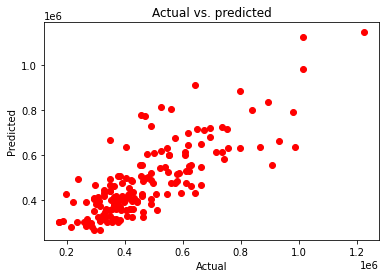

In [13]:
plt.scatter(y_test, y_pred, c='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. predicted')

In [14]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})
df = pred_y_df.astype(int)
df[0:10]

,Actual Value,Predicted value,Difference
0,458500,425140,33359
1,608300,611382,-3082
2,400750,400866,-116
3,693000,682100,10899
4,294000,408141,-114141
5,619500,644449,-24949
6,353500,401488,-47988
7,294000,406224,-112224
8,350000,329683,20316
9,798000,882694,-84694
